<a href="https://colab.research.google.com/github/isaacenyogoi/first-code/blob/master/Lab1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setup FEniCS environment  (Codes adapted from course page)

In [0]:
#@title
# Setup system environment and define utility functions and variables
from google.colab import files
try:
    from dolfin import *; from mshr import *
except ImportError as e:
    !apt-get install -y -qq software-properties-common python-software-properties module-init-tools
    !add-apt-repository -y ppa:fenics-packages/fenics
    !apt-get update -qq
    !sed -e 's:artful:bionic:' /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-artful.list > temp
    !mv temp /etc/apt/sources.list.d/fenics-packages-ubuntu-fenics-artful.list
    !sed -e 's:artful:bionic:' /etc/apt/sources.list > temp
    !mv temp /etc/apt/sources.list
    !apt-get update -qq
    !apt install -y --no-install-recommends fenics    
    from dolfin import *; from mshr import *
    
import matplotlib.pyplot as plt;
from IPython.display import clear_output, display, update_display; import time; import dolfin.common.plotting as fenicsplot 
import time
plt.style.use('classic')

Stokes equation;
\begin{equation}
\begin{aligned}
-\nu\Delta {u} + \nabla p  &= {f}  &\text{in}~ \Omega,\\
\nabla \cdot {u} & = 0 &\text{in}~ \Omega.\\
{u} = {g}_{D}~ \mbox{on}~ \partial \Omega_{D}, -p\vec{n} + \nu \nabla {u} \cdot {n} &= {g}_{N}~ \mbox{on}~ \partial \Omega _{N}. 
\end{aligned}
\end{equation}
Weak formulation; \\
Find $(u,p) \in (V\times Q)$ such that \\
\begin{equation}
r((u,p),(v,q)) = 0,
\end{equation}
where
\begin{equation}
r((u,p),(v,q)) = \int_\Omega (\nu\nabla u\cdot \nabla v - p \nabla\cdot v + q\nabla \cdot u ) ~\text{d}x - \int_\Omega fv ~\text{d}x - \int_{\partial \Omega_N} gv ~\text{d}s.
\end{equation}

1. Mixed formulation using TaylorHood elements. P1-P2 elements for pressure and velocity respectively. 

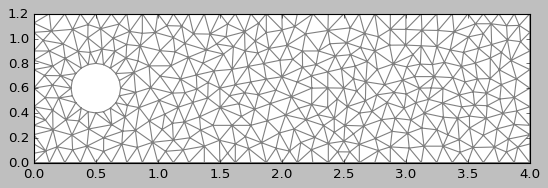

In [0]:
XMIN = 0.; XMAX = 4; YMIN = 0; YMAX = 1.2; G = [XMIN, XMAX, YMIN, YMAX]; eps = 1e-5; mresolution=20 # Geometry and mesh
mesh = generate_mesh(Rectangle(Point(G[0], G[2]), Point(G[1], G[3])) - Circle(Point(0.5, 0.5*(YMIN+YMAX)), .2, mresolution), mresolution)


VE = VectorElement("CG", mesh.ufl_cell(), 2); QE = FiniteElement("CG", mesh.ufl_cell(), 1); h = CellDiameter(mesh); # FEM functions
WE = VE * QE; W = FunctionSpace(mesh, WE); V = FunctionSpace(mesh, VE); Q = FunctionSpace(mesh, QE) # Make a mixed space
(v, q) = TestFunctions(W); w = Function(W); (u, p) = (as_vector((w[0], w[1])), w[2]); u0 = Function(V)

uin = Expression(("4*(x[1]*(YMAX-x[1]))/(YMAX*YMAX)", "0."), YMAX=YMAX, element = V.ufl_element()) # Inflow velocity
om = Expression("x[0] > XMAX - eps ? 1. : 0.", XMAX=XMAX, eps=eps, element = Q.ufl_element()) # Mark regions for boundary conditions
im = Expression("x[0] < XMIN + eps ? 1. : 0.", XMIN=XMIN, eps=eps, element = Q.ufl_element())
nm = Expression("x[0] > XMIN + eps && x[0] < XMAX - eps ? 1. : 0.", XMIN=XMIN, XMAX=XMAX, eps=eps, element = Q.ufl_element())

plot(mesh)

1. Mixed formulation using TaylorHood elements. P1-P2 elements for pressure and velocity respectively. 

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


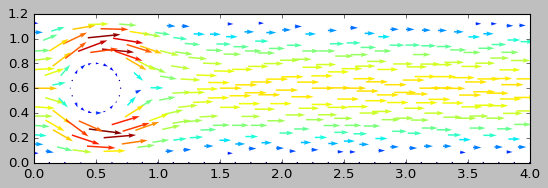

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


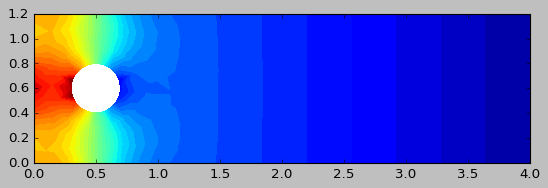

In [0]:
# Copyright (c) 2017-2018 Johan Jansson, Cem Degirmenci and David Kamensky 

nu = 1e-5;gamma = 10*1./h; f = Constant((0,0)); # Timestep, viscosity and stabilization parameters
theta = 0.5 # 0.5 - Midpoint rule, 1.0 - Implicit Euler, 0.0 - Explicit Euler
um = theta*u + (1.0-theta)*u0 # Weak residual of stabilized FEM for Navier-Stokes eq.
r =  ( nu*inner(grad(um), grad(v)) -  p*div(v) + q*div(um) - inner(f,v) )*dx \
       + gamma*(im*inner(u - uin, v) + nm*inner(u, v))*ds  # Weak boundary conditions
solve(r==0, w)
plot(u)
plt.show()
plot(p)
plt.show()
#pl, ax = plot_compact(u, t, stepcounter, Q, pl, ax) # Plot all quantities (see implementation above)


2. Mixed formulation using P1-P1 elements for both  pressure and velocity. 

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


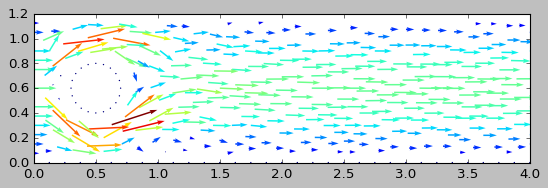

Calling FFC just-in-time (JIT) compiler, this may take some time.


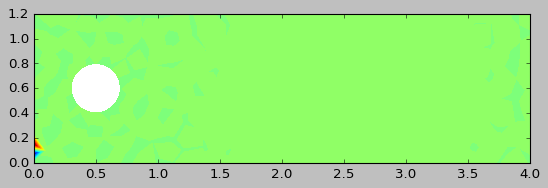

In [0]:
VE = VectorElement("CG", mesh.ufl_cell(), 1); QE = FiniteElement("CG", mesh.ufl_cell(), 1); h = CellDiameter(mesh); # FEM functions
WE = VE * QE; W = FunctionSpace(mesh, WE); V = FunctionSpace(mesh, VE); Q = FunctionSpace(mesh, QE) # Make a mixed space
(v, q) = TestFunctions(W); w = Function(W); (u, p) = (as_vector((w[0], w[1])), w[2]); u0 = Function(V)

uin = Expression(("4*(x[1]*(YMAX-x[1]))/(YMAX*YMAX)", "0."), YMAX=YMAX, element = V.ufl_element()) # Inflow velocity
om = Expression("x[0] > XMAX - eps ? 1. : 0.", XMAX=XMAX, eps=eps, element = Q.ufl_element()) # Mark regions for boundary conditions
im = Expression("x[0] < XMIN + eps ? 1. : 0.", XMIN=XMIN, eps=eps, element = Q.ufl_element())
nm = Expression("x[0] > XMIN + eps && x[0] < XMAX - eps ? 1. : 0.", XMIN=XMIN, XMAX=XMAX, eps=eps, element = Q.ufl_element())
nu = 1e-5;gamma = 10*1./h; f = Constant((0,0)); 
theta = 0.5 # 0.5 - Midpoint rule, 1.0 - Implicit Euler, 0.0 - Explicit Euler
um = theta*u + (1.0-theta)*u0 # Weak residual of stabilized FEM for Navier-Stokes eq.
r =  ( nu*inner(grad(um), grad(v)) -  p*div(v) + q*div(um) - inner(f,v) )*dx \
       + gamma*(im*inner(u - uin, v) + nm*inner(u, v))*ds  # Weak boundary conditions
solve(r==0, w)
plot(u);plt.show();plot(p);plt.show()




1. Mixed formulation using P1-P1 elements for both velocity and pressure with stabilization. 

Weak formulation; \\
Find $(u,p) \in (V\times Q)$ such that \\
\begin{equation}
r((u,p),(v,q)) = 0,
\end{equation}
where
\begin{equation}
r((u,p),(v,q)) = \int_\Omega (\nu\nabla u\cdot \nabla v - p \nabla\cdot v + q\nabla \cdot u + \underbrace{\delta \nabla q \cdot \nabla p}_{stabilization ~term}  ) ~\text{d}x - \int_\Omega (fv  + \underbrace{\delta \nabla q \cdot f}_{stabilization ~term} )~\text{d}x - \int_{\partial \Omega_N} gv ~\text{d}s,
\end{equation}
where $ \delta = \beta h^2, \beta $ = Constant and $h = $ mesh cell size. 

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


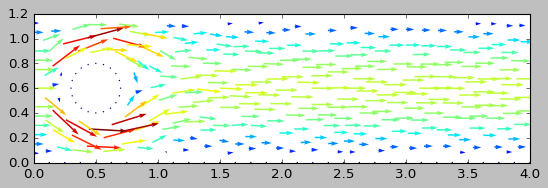

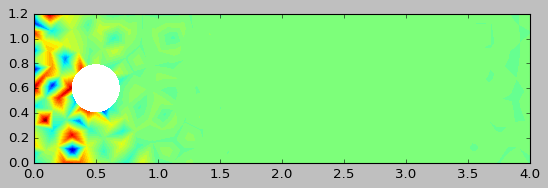

In [0]:
VE = VectorElement("CG", mesh.ufl_cell(), 1); QE = FiniteElement("CG", mesh.ufl_cell(), 1); h = CellDiameter(mesh);  # FEM functions
WE = VE * QE; W = FunctionSpace(mesh, WE); V = FunctionSpace(mesh, VE); Q = FunctionSpace(mesh, QE) # Make a mixed space
(v, q) = TestFunctions(W); w = Function(W); (u, p) = (as_vector((w[0], w[1])), w[2]); u0 = Function(V)

uin = Expression(("4*(x[1]*(YMAX-x[1]))/(YMAX*YMAX)", "0."), YMAX=YMAX, element = V.ufl_element()) # Inflow velocity
om = Expression("x[0] > XMAX - eps ? 1. : 0.", XMAX=XMAX, eps=eps, element = Q.ufl_element()) # Mark regions for boundary conditions
im = Expression("x[0] < XMIN + eps ? 1. : 0.", XMIN=XMIN, eps=eps, element = Q.ufl_element())
nm = Expression("x[0] > XMIN + eps && x[0] < XMAX - eps ? 1. : 0.", XMIN=XMIN, XMAX=XMAX, eps=eps, element = Q.ufl_element())
nu = 1e-5;gamma = 10*1./h; beta  = 1;delta = beta*h*h; f = Constant((0,0)); 
theta = 0.5 # 0.5 - Midpoint rule, 1.0 - Implicit Euler, 0.0 - Explicit Euler
um = theta*u + (1.0-theta)*u0 
# Weak residual of stabilized FEM for Navier-Stokes eq.
r =  ( nu*inner(grad(um), grad(v)) -  p*div(v) + q*div(um) - inner(f,v) )*dx + \
gamma*(im*inner(u - uin, v) + nm*inner(u, v))*ds + \
delta*inner(grad(q), grad(p))*dx - delta*inner(grad(q),f)*dx #stabilixation term
solve(r==0, w)
plot(u);plt.show();plot(p);plt.show()
